In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

penguins = pd.read_csv("penguins.csv")
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


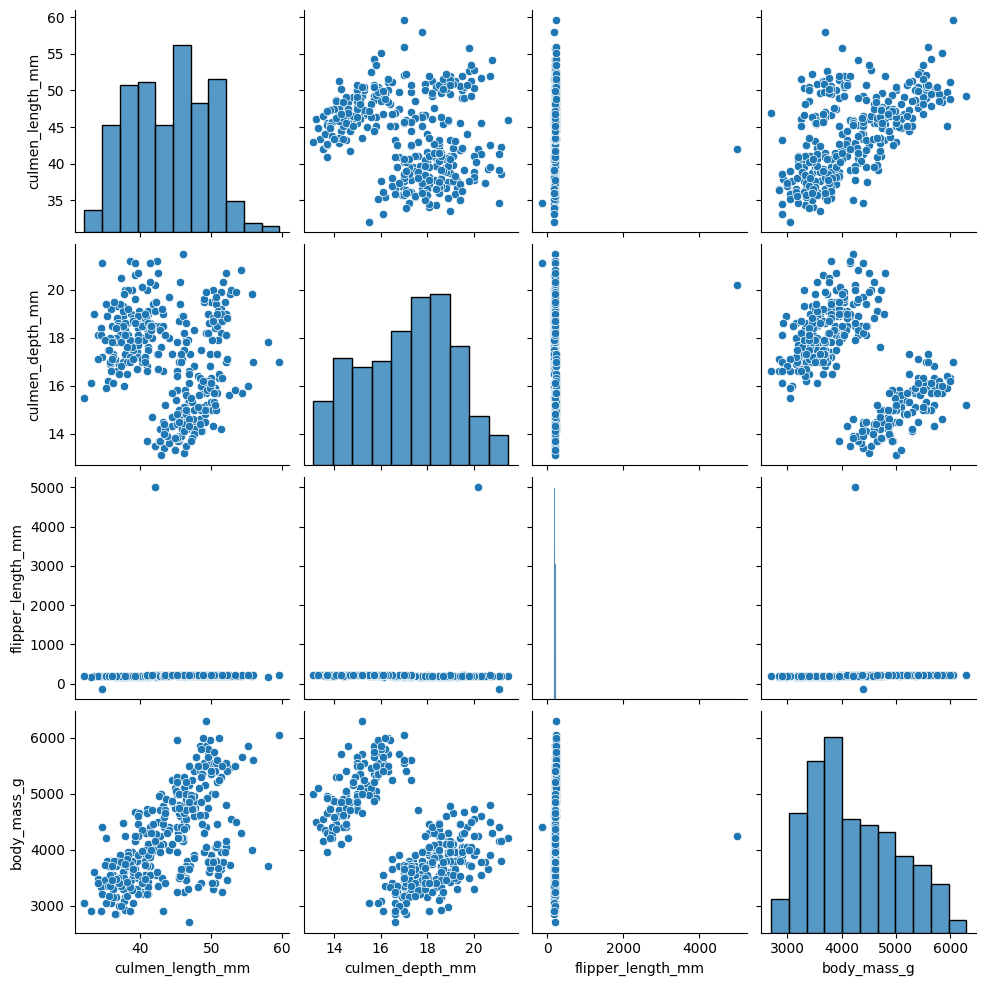

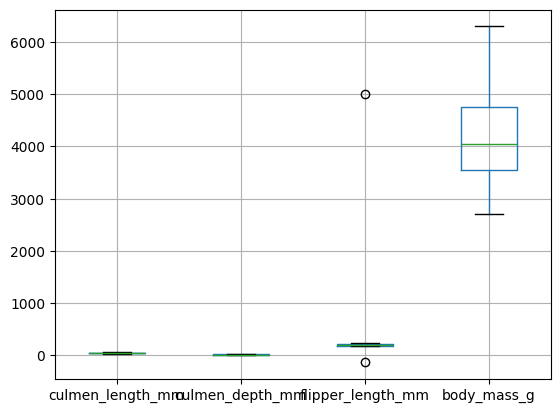

In [39]:
#EDA

sns.pairplot(penguins)
plt.show()

penguins_cleaned = penguins.dropna()
penguins.boxplot()
plt.show()

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9              42.0             20.2             5000.0       4250.0  MALE     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
14              34.6             21.1             -132.0       4400.0  MALE


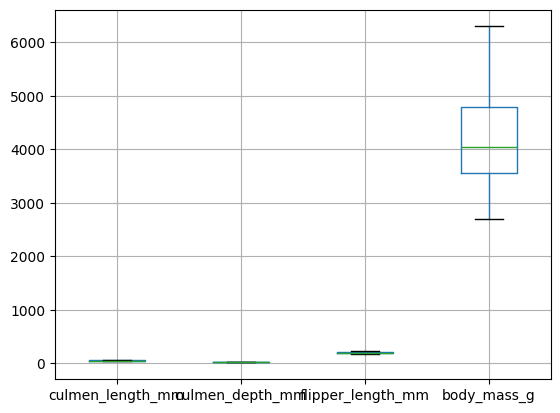

In [41]:
print(penguins_cleaned[penguins_cleaned['flipper_length_mm']>4000],
penguins_cleaned[penguins_cleaned['flipper_length_mm']<0])

penguins_cleaned = penguins_cleaned.drop([9,14])
penguins_cleaned.boxplot()
plt.show()

In [42]:
dum = pd.get_dummies(penguins_cleaned['sex'], prefix='sex')
df = penguins_cleaned.drop('sex', axis=1)
df = pd.concat([df, dum], axis=1)
df.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,False,True


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


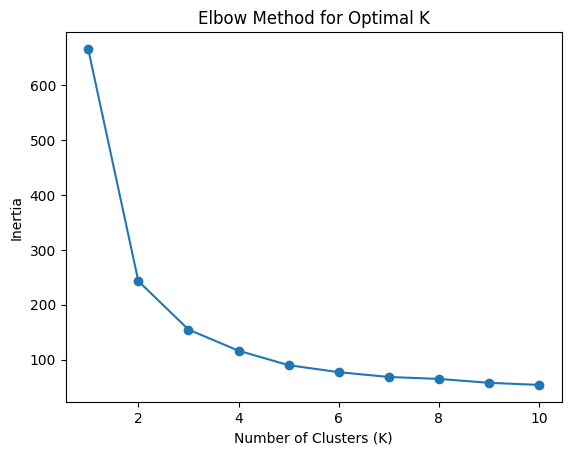

In [44]:
#Determine the optimal number of clusters using the Elbow Method
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [45]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
penguins_cleaned['cluster'] = kmeans_final.fit_predict(X_scaled)

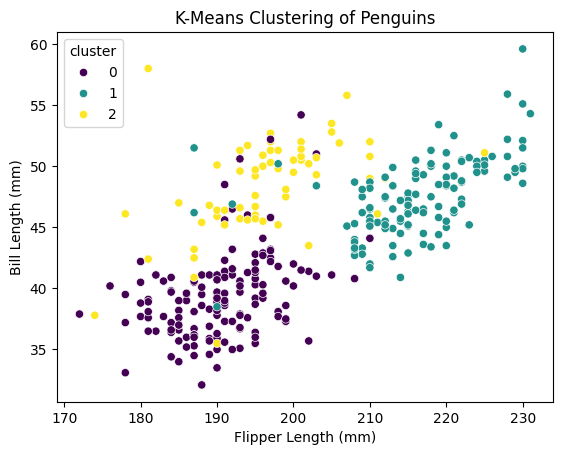

In [47]:
sns.scatterplot(x='flipper_length_mm', y='culmen_length_mm', hue='cluster', data=penguins_cleaned, palette='viridis')
plt.title('K-Means Clustering of Penguins')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.show()

In [48]:
cluster_means = penguins_cleaned.groupby('cluster')[['culmen_length_mm', 'flipper_length_mm']].mean()
print(cluster_means)

         culmen_length_mm  flipper_length_mm
cluster                                     
0               39.371233         190.424658
1               47.489431         216.146341
2               47.970312         196.140625


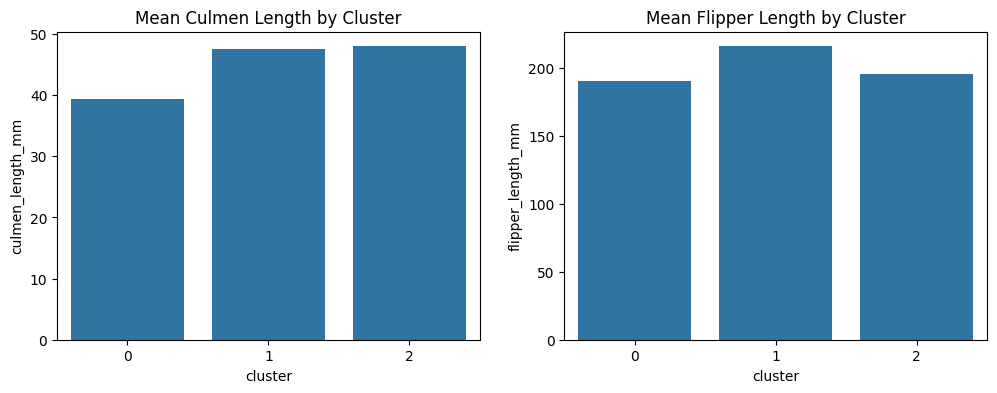

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x=cluster_means.index, y='culmen_length_mm', data=cluster_means, ax=axes[0])
axes[0].set_title('Mean Culmen Length by Cluster')

sns.barplot(x=cluster_means.index, y='flipper_length_mm', data=cluster_means, ax=axes[1])
axes[1].set_title('Mean Flipper Length by Cluster')

plt.show()